In [103]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("./Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [104]:
#Attempt 1 - Removed Noisy Variables

# Drop the non-beneficial ID columns, 'EIN', 'NAME', 'SPECIAL_CONSIDERATIONS', and 'USE_CASE'.
application_df.drop(columns=['EIN','NAME'],axis=1, inplace=True)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [105]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [106]:
# Look at APPLICATION_TYPE value counts for binning
application_type_counts = application_df.APPLICATION_TYPE.value_counts()
application_type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

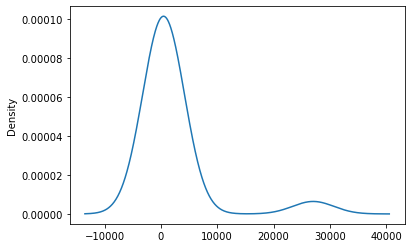

In [107]:
# Visualize the value counts of APPLICATION_TYPE
application_type_counts.plot.density()

In [108]:
# Determine which values to replace if counts are less than 500?
replace_application = list(application_type_counts[application_type_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [109]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df.CLASSIFICATION.value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

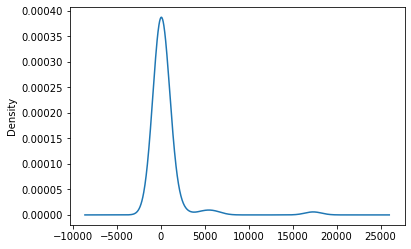

In [110]:
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()

In [111]:
# Determine which values to replace if counts are less than 1800?
replace_class = list(classification_counts[classification_counts < 1800].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

# Attempt 1

In [112]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

# Check the number of unique values in each column
application_df[application_cat].nunique()

APPLICATION_TYPE          9
AFFILIATION               6
CLASSIFICATION            6
USE_CASE                  5
ORGANIZATION              4
INCOME_AMT                9
SPECIAL_CONSIDERATIONS    2
dtype: int64

In [113]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

C:\Users\bruno\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [114]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

C:\Users\bruno\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [115]:
# Split our preprocessed data into our features and target arrays
X = application_df.drop(['IS_SUCCESSFUL'],1).values
y = application_df['IS_SUCCESSFUL'].values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

C:\Users\bruno\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [116]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [117]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  100
hidden_nodes_layer2 = 400

nn = tf.keras.models.Sequential()

In [118]:
# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 100)               4400      
_________________________________________________________________
dense_27 (Dense)             (None, 400)               40400     
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 401       
Total params: 45,201
Trainable params: 45,201
Non-trainable params: 0
_________________________________________________________________


In [119]:
# Import checkpoint dependencies to create checkpoints
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [120]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [121]:
# Create a callback that saves the model's weights every epoch
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=4020)

In [122]:
# Train the model
fit_model = nn.fit(X_train, y_train,epochs=50, callbacks=[cp_callback])

Epoch 1/50
804/804 [==============================] - 1s 664us/step - loss: 58156.4336 - accuracy: 0.4950
Epoch 2/50
804/804 [==============================] - 1s 672us/step - loss: 44969.1211 - accuracy: 0.4935
Epoch 3/50
804/804 [==============================] - 1s 663us/step - loss: 20119.9121 - accuracy: 0.4987
Epoch 4/50
804/804 [==============================] - 1s 665us/step - loss: 5021.4634 - accuracy: 0.5122
Epoch 5/50
766/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5321
Epoch 00005: saving model to checkpoints\weights.05.hdf5
804/804 [==============================] - 1s 664us/step - loss: 0.6912 - accuracy: 0.5324
Epoch 6/50
804/804 [==============================] - 1s 677us/step - loss: 0.6912 - accuracy: 0.5324
Epoch 7/50
804/804 [==============================] - 1s 658us/step - loss: 0.6912 - accuracy: 0.5324
Epoch 8/50
804/804 [==============================] - 1s 702us/step - loss: 0.6913 - accuracy: 0.5324
Epoch 9/50
804/804 [=======

In [123]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.7997 - accuracy: 0.5373
Loss: 0.7997041940689087, Accuracy: 0.5372594594955444


<AxesSubplot:>

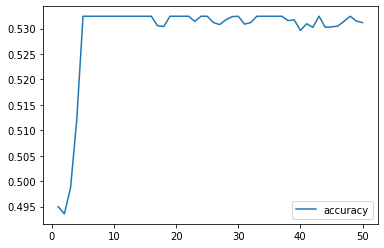

In [124]:
# Plot Accuracy
history_df = pd.DataFrame(fit_model.history, index=range(1, len(fit_model.history["loss"])+1))
history_df.plot(y="accuracy")

In [125]:
# Save and export your results to an HDF5 file, and name it AlphabetSoupCharity.h5
nn.save("AlphabetSoupCharity_Optimization_Attempt_1.h5")

# Attempt 2

In [126]:
#Removing Noisy Variables & Adding additional neurons to the hidden layers and hidden layers
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  100
hidden_nodes_layer2 = 80
hidden_nodes_layer3 = 50

nn = tf.keras.models.Sequential()


# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 100)               4400      
_________________________________________________________________
dense_30 (Dense)             (None, 80)                8080      
_________________________________________________________________
dense_31 (Dense)             (None, 50)                4050      
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 51        
Total params: 16,581
Trainable params: 16,581
Non-trainable params: 0
_________________________________________________________________


In [127]:
# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [128]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [129]:
# Create a callback that saves the model's weights every epoch
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=4020)

In [130]:
# Train the model
fit_model = nn.fit(X_train, y_train,epochs=150, callbacks=[cp_callback])

Epoch 1/150
804/804 [==============================] - 0s 555us/step - loss: 59576.6055 - accuracy: 0.4893
Epoch 2/150
804/804 [==============================] - 0s 562us/step - loss: 30022.4082 - accuracy: 0.4984
Epoch 3/150
804/804 [==============================] - 0s 528us/step - loss: 16314.4502 - accuracy: 0.4930
Epoch 4/150
804/804 [==============================] - 0s 560us/step - loss: 12955.7969 - accuracy: 0.5015
Epoch 5/150
748/804 [==========================>...] - ETA: 0s - loss: 62496.5938 - accuracy: 0.4776
Epoch 00005: saving model to checkpoints\weights.05.hdf5
804/804 [==============================] - 0s 553us/step - loss: 60992.3633 - accuracy: 0.4772
Epoch 6/150
804/804 [==============================] - 0s 597us/step - loss: 54798.0625 - accuracy: 0.5068
Epoch 7/150
804/804 [==============================] - 0s 539us/step - loss: 10683.1348 - accuracy: 0.5020
Epoch 8/150
804/804 [==============================] - 0s 534us/step - loss: 9312.5254 - accuracy: 0.4898

Epoch 63/150
804/804 [==============================] - 0s 524us/step - loss: 0.6916 - accuracy: 0.5324
Epoch 64/150
804/804 [==============================] - 0s 529us/step - loss: 0.6914 - accuracy: 0.5324
Epoch 65/150
725/804 [==========================>...] - ETA: 0s - loss: 0.6915 - accuracy: 0.5316
Epoch 00065: saving model to checkpoints\weights.65.hdf5
804/804 [==============================] - 0s 558us/step - loss: 0.6914 - accuracy: 0.5324
Epoch 66/150
804/804 [==============================] - 0s 545us/step - loss: 0.6912 - accuracy: 0.5324
Epoch 67/150
804/804 [==============================] - 0s 553us/step - loss: 0.6914 - accuracy: 0.5324
Epoch 68/150
804/804 [==============================] - 0s 542us/step - loss: 0.6912 - accuracy: 0.5324
Epoch 69/150
804/804 [==============================] - 0s 549us/step - loss: 0.6913 - accuracy: 0.5315
Epoch 70/150
781/804 [============================>.] - ETA: 0s - loss: 0.6914 - accuracy: 0.5328
Epoch 00070: saving model to che

740/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5337
Epoch 00125: saving model to checkpoints\weights.125.hdf5
804/804 [==============================] - 0s 551us/step - loss: 0.6912 - accuracy: 0.5324
Epoch 126/150
804/804 [==============================] - 0s 552us/step - loss: 0.6913 - accuracy: 0.5324
Epoch 127/150
804/804 [==============================] - 0s 552us/step - loss: 0.6914 - accuracy: 0.5324
Epoch 128/150
804/804 [==============================] - 0s 546us/step - loss: 0.6913 - accuracy: 0.5324
Epoch 129/150
804/804 [==============================] - 0s 553us/step - loss: 0.6913 - accuracy: 0.5324
Epoch 130/150
749/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5324
Epoch 00130: saving model to checkpoints\weights.130.hdf5
804/804 [==============================] - 0s 546us/step - loss: 0.6913 - accuracy: 0.5324
Epoch 131/150
804/804 [==============================] - 0s 517us/step - loss: 0.6913 - accuracy: 

In [131]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.7050 - accuracy: 0.5048
Loss: 0.7050351500511169, Accuracy: 0.5048396587371826


<AxesSubplot:>

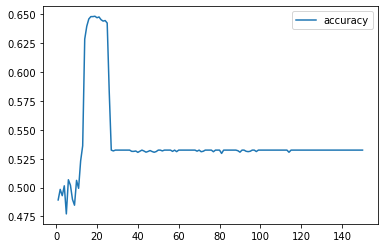

In [132]:
# Plot Accuracy
history_df = pd.DataFrame(fit_model.history, index=range(1, len(fit_model.history["loss"])+1))
history_df.plot(y="accuracy")

In [133]:
# Save and export your results to an HDF5 file, and name it AlphabetSoupCharity.h5
nn.save("AlphabetSoupCharity_Optimization_Attempt_2.h5")

# Attempt 3

In [134]:
#Removing Noisy Variables, Adding additional neurons to the hidden layers and hidden layers & Changing activation to tanh
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  100
hidden_nodes_layer2 = 80
hidden_nodes_layer3 = 50

nn = tf.keras.models.Sequential()


# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="tanh"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 100)               4400      
_________________________________________________________________
dense_34 (Dense)             (None, 80)                8080      
_________________________________________________________________
dense_35 (Dense)             (None, 50)                4050      
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 51        
Total params: 16,581
Trainable params: 16,581
Non-trainable params: 0
_________________________________________________________________


In [135]:
# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [136]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [137]:
# Create a callback that saves the model's weights every epoch
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=4020)

In [138]:
# Train the model
fit_model = nn.fit(X_train, y_train,epochs=100, callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 0s 540us/step - loss: 0.6944 - accuracy: 0.5215
Epoch 2/100
804/804 [==============================] - 0s 573us/step - loss: 0.6920 - accuracy: 0.5248
Epoch 3/100
804/804 [==============================] - 0s 531us/step - loss: 0.6920 - accuracy: 0.5268
Epoch 4/100
804/804 [==============================] - 0s 529us/step - loss: 0.6920 - accuracy: 0.5302
Epoch 5/100
763/804 [===========================>..] - ETA: 0s - loss: 0.6917 - accuracy: 0.5311
Epoch 00005: saving model to checkpoints\weights.05.hdf5
804/804 [==============================] - 0s 536us/step - loss: 0.6917 - accuracy: 0.5312
Epoch 6/100
804/804 [==============================] - 0s 535us/step - loss: 0.6920 - accuracy: 0.5255
Epoch 7/100
804/804 [==============================] - 0s 530us/step - loss: 0.6923 - accuracy: 0.5246
Epoch 8/100
804/804 [==============================] - 0s 531us/step - loss: 0.6920 - accuracy: 0.5268
Epoch 9/100
804/804 [=============

804/804 [==============================] - 0s 557us/step - loss: 0.6922 - accuracy: 0.5288
Epoch 64/100
804/804 [==============================] - 0s 580us/step - loss: 0.6922 - accuracy: 0.5259
Epoch 65/100
754/804 [===========================>..] - ETA: 0s - loss: 0.6924 - accuracy: 0.5267
Epoch 00065: saving model to checkpoints\weights.65.hdf5
804/804 [==============================] - 0s 539us/step - loss: 0.6924 - accuracy: 0.5257
Epoch 66/100
804/804 [==============================] - 0s 539us/step - loss: 0.6921 - accuracy: 0.5257
Epoch 67/100
804/804 [==============================] - 0s 545us/step - loss: 0.6917 - accuracy: 0.5286
Epoch 68/100
804/804 [==============================] - 0s 532us/step - loss: 0.6923 - accuracy: 0.5263
Epoch 69/100
804/804 [==============================] - 0s 545us/step - loss: 0.6922 - accuracy: 0.5264
Epoch 70/100
754/804 [===========================>..] - ETA: 0s - loss: 0.6919 - accuracy: 0.5309
Epoch 00070: saving model to checkpoints\weig

In [139]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.7042 - accuracy: 0.4501
Loss: 0.7041828036308289, Accuracy: 0.45014578104019165


<AxesSubplot:>

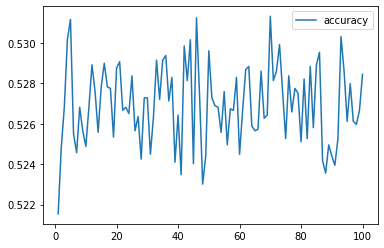

In [140]:
# Plot Accuracy
history_df = pd.DataFrame(fit_model.history, index=range(1, len(fit_model.history["loss"])+1))
history_df.plot(y="accuracy")

In [141]:
# Save and export your results to an HDF5 file, and name it AlphabetSoupCharity.h5
nn.save("AlphabetSoupCharity_Optimization_Attempt_3.h5")